## Preparation

### Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import datetime # for tensorboard
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from keras import backend as K

import time

import os.path
from tensorflow.keras.models import load_model

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display multiple outputs

from IPython.display import Image

from tensorflow.keras.callbacks import TensorBoard # Import TensorBoard

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

### The data

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# also want a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,  
                                                    test_size = 0.2, random_state = 42)

In [7]:
mnist; print();
x_train.shape; print();
x_val.shape; print();
x_test.shape; print();
y_train.shape; print();
y_val.shape; print();
y_test.shape

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

(48000, 28, 28)

(12000, 28, 28)

(10000, 28, 28)

(48000,)

(12000,)

(10000,)

In [8]:
tf.convert_to_tensor(x_train)

<tf.Tensor: shape=(48000, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [9]:
tf.convert_to_tensor(y_train)

<tf.Tensor: shape=(48000,), dtype=uint8, numpy=array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)>

In [10]:
x_train_subset = x_train[0:5000,:,:]
x_train_subset_flat = x_train_subset.flatten().reshape(5000, 784)

y_train_subset = y_train[0:5000]

### Load models

In [11]:
model_D8 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_D8')
model_D128 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_D128')
model_overfit = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_overfit')
model3 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model3')
model4 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model4')
model5 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5')
model5a = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5a')
model5b = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5b')
model5c = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5c')
model6 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model6')
model7 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model7')

## Visualisations

### Visualise inputs with t-SNE

#### model_D8

https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

In [ ]:
data_5000 = x_train[0:5000] # data_5000.shape - (5000, 28, 28)
data_5000_flat = data_5000.flatten().reshape(5000, 784) # data_5000_flat.shape - (5000, 784)
labels_5000 = y_train[0:5000] # labels_5000.shape - (5000,)

data_5000_val = x_val[0:5000]
data_5000_flat_val = data_5000_val.flatten().reshape(5000, 784) 
labels_5000_val = y_val[0:5000] 

In [ ]:
inputD8 = model_D8.input # KerasTensor: shape=(None, 28, 28)
outputsD8 = [layer.output for layer in model_D8.layers] # all layer outputs
# outputsD8 
# [<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten')>,
#  <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'dense')>,
#  <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>]
functorsD8 = K.function([model_D8.input], outputsD8) # evaluation functions

layer_outsD8 = functorsD8([data_5000]) 

In [ ]:
# outputsD8 = [layer.output for layer in model_D8.layers]          # all layer outputs
# functorsD8 = [K.function([model_D8.input], [out]) for out in outputsD8]    # evaluation functions
# layer_outsD8 = [func([data_5000]) for func in functorsD8]

# print("simple model has the following layers:")
# model_D8.layers[:]; print()
# print("Output layer shape is:", (layer_outsD8[2])[0].shape)
# print("Layer output is:")
# (layer_outsD8[2])[0]; print()
# print("Prediction is", np.argmax((layer_outsD8[2])[0],axis=1))
# print("Output labels are:", labels_5000)
# print("differences betwen prediction and labels is:", (np.argmax((layer_outsD8[2])[0],axis=1)-labels_5000))
# print("Error rate is:", np.count_nonzero(np.argmax((layer_outsD8[2])[0],axis=1)-labels_5000)/len(labels_5000))

In [ ]:
print("simple model has the following layers:")
model_D8.layers[:]; print()
print("Output layer shape is:", (layer_outsD8[2]).shape)
print("Layer output is:")
(layer_outsD8[2]); print()
print("Prediction is", np.argmax(layer_outsD8[2],axis=1))
print("Output labels are:", labels_5000)
print("differences betwen prediction and labels is:", (np.argmax(layer_outsD8[2],axis=1)-labels_5000))
print("Error rate is:", np.count_nonzero(np.argmax(layer_outsD8[2],axis=1)-labels_5000)/len(labels_5000))

simple model has the following layers:



Output layer shape is: (5000, 10)
Layer output is:


array([[2.2859124e-06, 1.7041972e-07, 6.3418952e-08, ..., 2.5335134e-09,
        1.2364807e-03, 1.2171912e-04],
       [6.8353146e-01, 1.6219739e-11, 1.0632607e-04, ..., 2.3616310e-07,
        1.0721350e-05, 4.0371774e-06],
       [2.1925414e-08, 9.7470278e-01, 1.8734317e-02, ..., 2.5213553e-04,
        2.7052995e-03, 7.9118361e-04],
       ...,
       [3.8797749e-05, 9.4282068e-11, 7.3514747e-07, ..., 7.1002141e-04,
        2.3598311e-06, 8.9559993e-03],
       [2.2530516e-08, 1.3751432e-10, 2.8848729e-06, ..., 8.3339705e-07,
        5.2443680e-05, 8.7912200e-04],
       [3.5371995e-03, 1.8299141e-05, 9.2266500e-03, ..., 2.3039240e-05,
        5.7036705e-02, 6.8774237e-04]], dtype=float32)


Prediction is [5 0 1 ... 4 4 5]
Output labels are: [5 0 1 ... 4 4 5]
differences betwen prediction and labels is: [0 0 0 ... 0 0 0]
Error rate is: 0.069


In [ ]:
tsne_model = TSNE(n_components=2, random_state=0)

towardsdatascience.com Visualising high-dimensional datasets using PCA and t-SNE in Python article:

https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b 

In [ ]:
time_start = time.time()

tsne_data = tsne_model.fit_transform(data_5000_flat) # (5000, 2)
tsne_data = np.vstack((tsne_data.T, labels_5000)).T # (5000, 3) 
# tsne_data
tsne_data = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 76.85325932502747 seconds


In [ ]:
tsneD8_1 = tsne_model.fit_transform((layer_outsD8[1])) 
tsneD8_1 = np.vstack((tsneD8_1.T, labels_5000)).T 
# tsneD8_1; print()
tsneD8_1 = pd.DataFrame(data=tsneD8_1, columns=('Dim_1', 'Dim_2', 'label'))
# tsneD8_1

In [ ]:
tsneD8_2 = tsne_model.fit_transform((layer_outsD8[2])) 
tsneD8_2 = np.vstack((tsneD8_2.T, labels_5000)).T 
# tsneD8_2; print()
tsneD8_2 = pd.DataFrame(data=tsneD8_2, columns=('Dim_1', 'Dim_2', 'label'))
# tsneD8_2

In [ ]:
# same thing for validation
layer_outsD8_val = functorsD8([data_5000_val]) 

tsne_data_val = tsne_model.fit_transform(data_5000_flat_val) 
tsne_data_val = np.vstack((tsne_data_val.T, labels_5000_val)).T 
tsne_data_val = pd.DataFrame(data=tsne_data_val, columns=('Dim_1', 'Dim_2', 'label'))

tsneD8_1_val = tsne_model.fit_transform((layer_outsD8_val[1])) 
tsneD8_1_val = np.vstack((tsneD8_1_val.T, labels_5000_val)).T 
tsneD8_1_val = pd.DataFrame(data=tsneD8_1_val, columns=('Dim_1', 'Dim_2', 'label'))

tsneD8_2_val = tsne_model.fit_transform((layer_outsD8_val[2])) 
tsneD8_2_val = np.vstack((tsneD8_2_val.T, labels_5000_val)).T 
tsneD8_2_val = pd.DataFrame(data=tsneD8_2_val, columns=('Dim_1', 'Dim_2', 'label'))

Text(0.5, 0.98, 'D8 model training')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense')

Text(0.5, 1.0, 'Output')

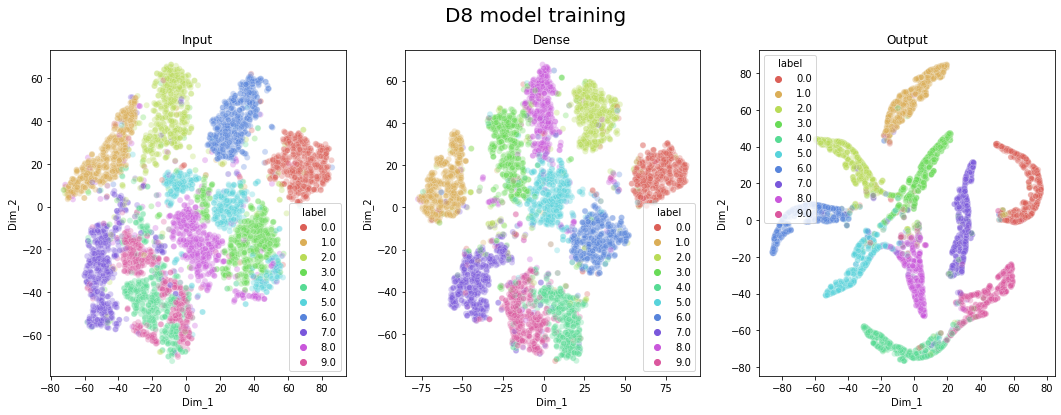

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('D8 model training', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD8_1,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD8_2,
    legend="full", alpha=0.3, ax=ax3)

Text(0.5, 0.98, 'D8 model validation')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense')

Text(0.5, 1.0, 'Output')

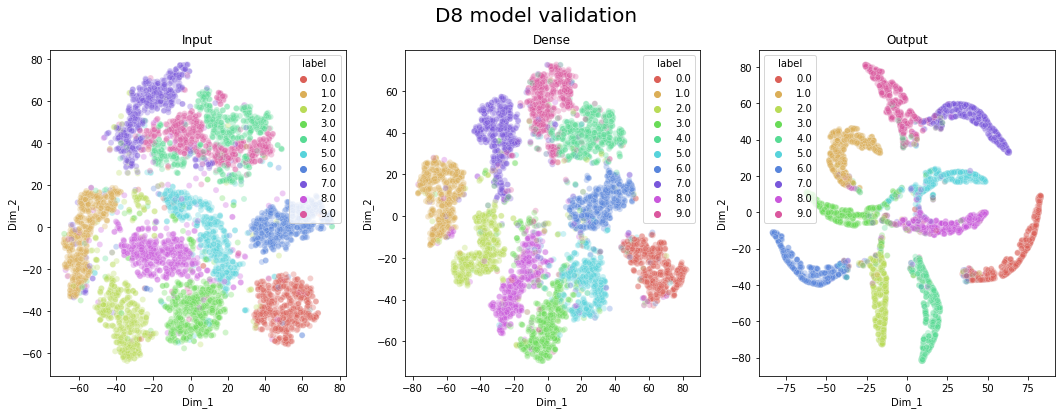

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('D8 model validation', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data_val,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD8_1_val,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD8_2_val,
    legend="full", alpha=0.3, ax=ax3)

#### model_D128

In [ ]:
inputD128 = model_D128.input 
outputsD128 = [layer.output for layer in model_D128.layers] 

functorsD128 = K.function([model_D128.input], outputsD128) # evaluation functions
layer_outsD128 = functorsD128([data_5000]) 

In [ ]:
tsneD128_1 = tsne_model.fit_transform((layer_outsD128[1])) 
tsneD128_1 = np.vstack((tsneD128_1.T, labels_5000)).T 
# tsneD128_1; print()
tsneD128_1 = pd.DataFrame(data=tsneD128_1, columns=('Dim_1', 'Dim_2', 'label'))
# tsneD128_1

In [ ]:
tsneD128_2 = tsne_model.fit_transform((layer_outsD128[2])) 
tsneD128_2 = np.vstack((tsneD128_2.T, labels_5000)).T 
# tsneD128_2; print()
tsneD128_2 = pd.DataFrame(data=tsneD128_2, columns=('Dim_1', 'Dim_2', 'label'))
# tsneD128_2

In [ ]:
# same thing for validation
layer_outsD128_val = functorsD128([data_5000_val]) 

tsneD128_1_val = tsne_model.fit_transform((layer_outsD128_val[1])) 
tsneD128_1_val = np.vstack((tsneD128_1_val.T, labels_5000_val)).T 
tsneD128_1_val = pd.DataFrame(data=tsneD128_1_val, columns=('Dim_1', 'Dim_2', 'label'))

tsneD128_2_val = tsne_model.fit_transform((layer_outsD128_val[2])) 
tsneD128_2_val = np.vstack((tsneD128_2_val.T, labels_5000_val)).T 
tsneD128_2_val = pd.DataFrame(data=tsneD128_2_val, columns=('Dim_1', 'Dim_2', 'label'))

KeyboardInterrupt: ignored

Text(0.5, 0.98, 'D128 model training')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense')

Text(0.5, 1.0, 'Output')

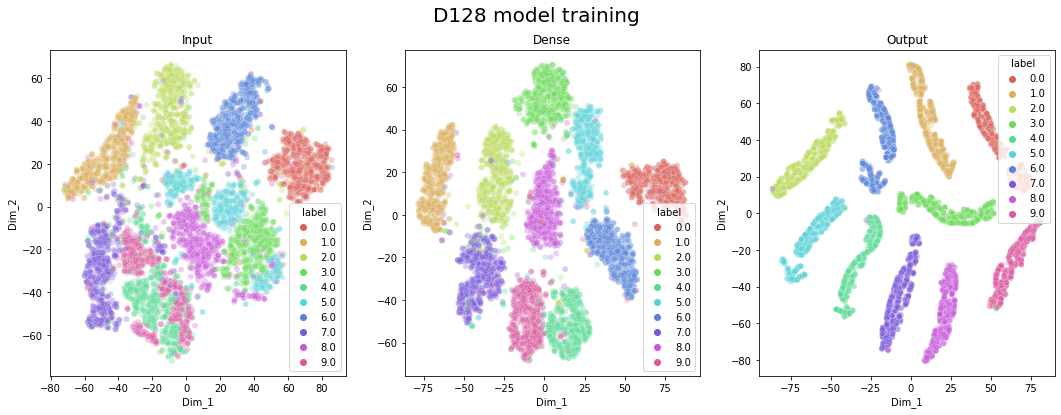

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('D128 model training', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD128_1,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD128_2,
    legend="full", alpha=0.3, ax=ax3)

Text(0.5, 0.98, 'D128 model validation')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense')

Text(0.5, 1.0, 'Output')

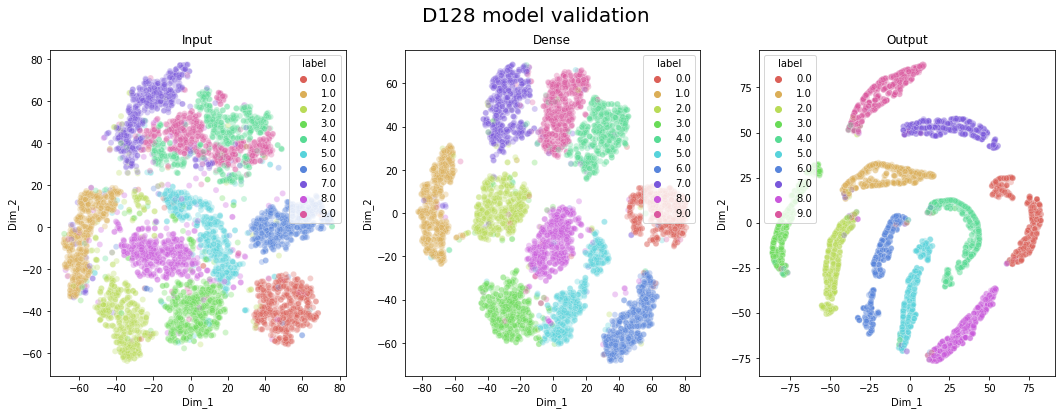

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('D128 model validation', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data_val,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD128_1_val,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD128_2_val,
    legend="full", alpha=0.3, ax=ax3)

#### model_overfit

In [ ]:
inputoverfit = model_overfit.input 
outputsoverfit = [layer.output for layer in model_overfit.layers] 

functorsoverfit = K.function([model_overfit.input], outputsoverfit) # evaluation functions
layer_outsoverfit = functorsoverfit([data_5000]) 

In [ ]:
tsneoverfit_1 = tsne_model.fit_transform((layer_outsoverfit[1])) 
tsneoverfit_1 = np.vstack((tsneD128_1.T, labels_5000)).T 
# tsneoverfit_1; print()
tsneoverfit_1 = pd.DataFrame(data=tsneD128_1, columns=('Dim_1', 'Dim_2', 'label'))
# tsneoverfit_1

In [ ]:
tsneoverfit_2 = tsne_model.fit_transform((layer_outsoverfit[2])) 
tsneoverfit_2 = np.vstack((tsneoverfit_2.T, labels_5000)).T 
# tsneoverfit_2; print()
tsneoverfit_2 = pd.DataFrame(data=tsneoverfit_2, columns=('Dim_1', 'Dim_2', 'label'))
# tsneoverfit_2

In [ ]:
tsneoverfit_3 = tsne_model.fit_transform((layer_outsoverfit[3])) 
tsneoverfit_3 = np.vstack((tsneoverfit_3.T, labels_5000)).T 
# tsneoverfit_3; print()
tsneoverfit_3 = pd.DataFrame(data=tsneoverfit_3, columns=('Dim_1', 'Dim_2', 'label'))
# tsneoverfit_3

In [ ]:
tsneoverfit_4 = tsne_model.fit_transform((layer_outsoverfit[4])) 
tsneoverfit_4 = np.vstack((tsneoverfit_4.T, labels_5000)).T 
# tsneoverfit_4; print()
tsneoverfit_4 = pd.DataFrame(data=tsneoverfit_4, columns=('Dim_1', 'Dim_2', 'label'))
# tsneoverfit_4

In [ ]:
# same thing for validation
layer_outsoverfit_val = functorsoverfit([data_5000_val]) 

tsneoverfit_1_val = tsne_model.fit_transform((layer_outsoverfit_val[1])) 
tsneoverfit_1_val = np.vstack((tsneoverfit_1_val.T, labels_5000_val)).T 
tsneoverfit_1_val = pd.DataFrame(data=tsneoverfit_1_val, columns=('Dim_1', 'Dim_2', 'label'))

tsneoverfit_2_val = tsne_model.fit_transform((layer_outsoverfit_val[2])) 
tsneoverfit_2_val = np.vstack((tsneoverfit_2_val.T, labels_5000_val)).T 
tsneoverfit_2_val = pd.DataFrame(data=tsneoverfit_2_val, columns=('Dim_1', 'Dim_2', 'label'))

tsneoverfit_3_val = tsne_model.fit_transform((layer_outsoverfit_val[3])) 
tsneoverfit_3_val = np.vstack((tsneoverfit_3_val.T, labels_5000_val)).T 
tsneoverfit_3_val = pd.DataFrame(data=tsneoverfit_3_val, columns=('Dim_1', 'Dim_2', 'label'))

tsneoverfit_4_val = tsne_model.fit_transform((layer_outsoverfit_val[4])) 
tsneoverfit_4_val = np.vstack((tsneoverfit_4_val.T, labels_5000_val)).T 
tsneoverfit_4_val = pd.DataFrame(data=tsneoverfit_4_val, columns=('Dim_1', 'Dim_2', 'label'))

Text(0.5, 0.98, 'Overfitting model training')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense 1')

Text(0.5, 1.0, 'Dense 2')

Text(0.5, 1.0, 'Dense 3')

Text(0.5, 1.0, 'Output')

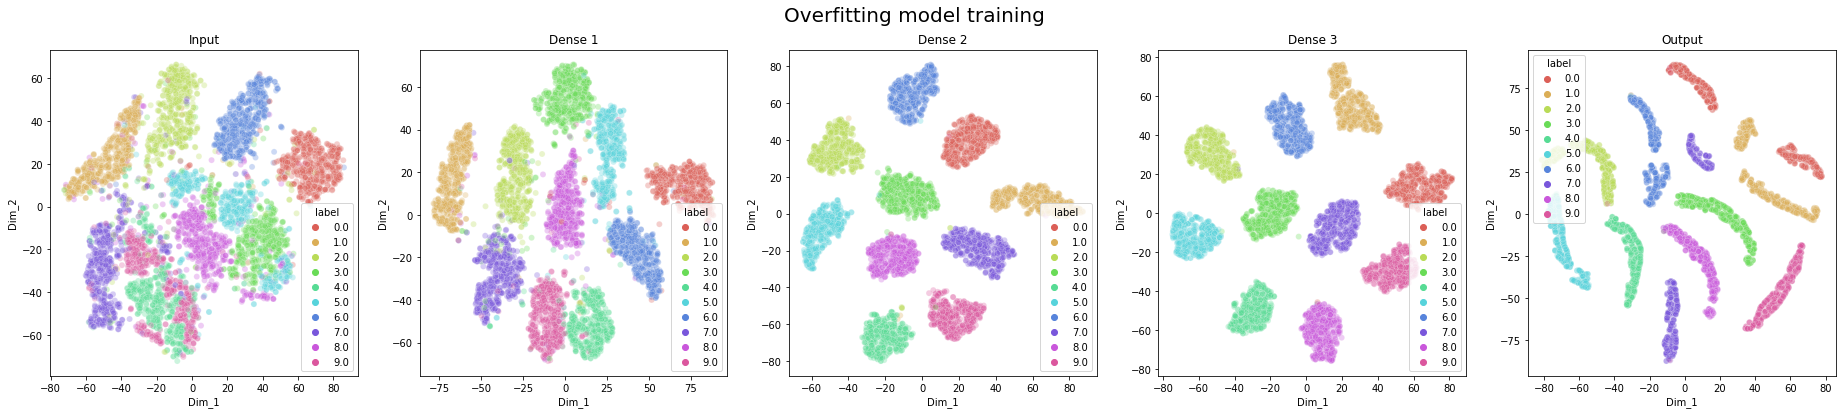

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(32,6))
fig.suptitle('Overfitting model training', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense 1')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_1,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Dense 2')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_2,
    legend="full", alpha=0.3, ax=ax3)

ax4.set_title('Dense 3')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_3,
    legend="full", alpha=0.3, ax=ax4)

ax5.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_4,
    legend="full", alpha=0.3, ax=ax5)

Text(0.5, 0.98, 'Overfitting model validation')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense 1')

Text(0.5, 1.0, 'Dense 2')

Text(0.5, 1.0, 'Dense 3')

Text(0.5, 1.0, 'Output')

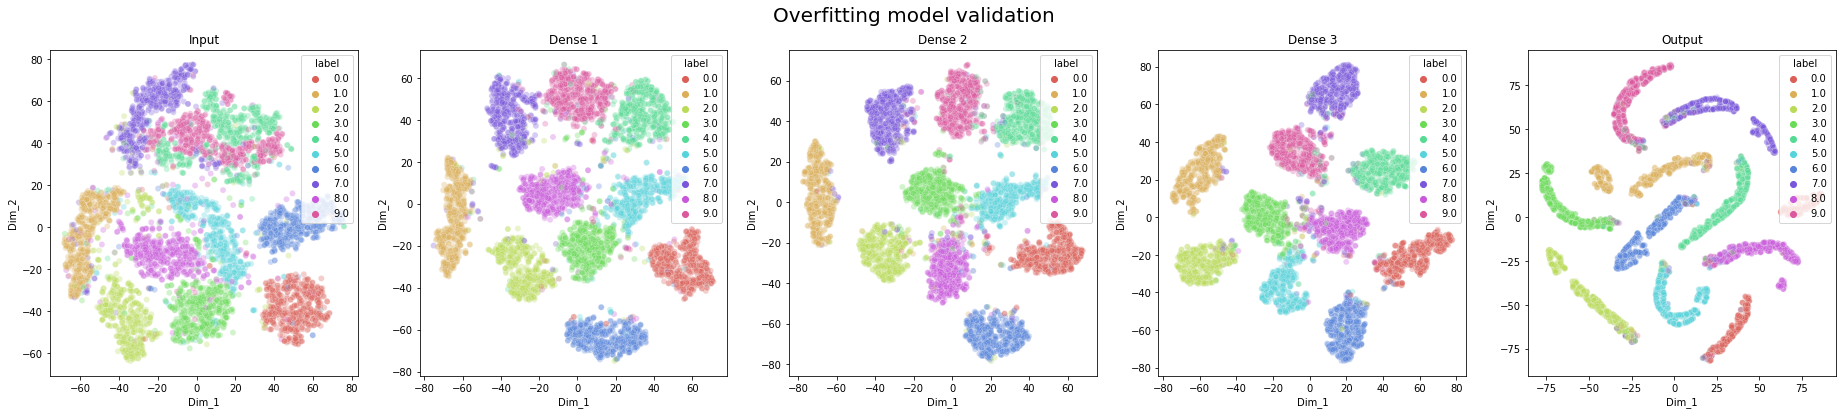

In [ ]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize=(32,6))
fig.suptitle('Overfitting model validation', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data_val,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense 1')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_1_val,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Dense 2')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_2_val,
    legend="full", alpha=0.3, ax=ax3)

ax4.set_title('Dense 3')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_3_val,
    legend="full", alpha=0.3, ax=ax4)

ax5.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneoverfit_4_val,
    legend="full", alpha=0.3, ax=ax5)

### Dimensionality reduction techniques comparison and how well they distinguish digits. 

https://github.com/saradhix/mnist_visual
https://www.linkedin.com/pulse/visualising-mnist-dataset-manifold-learning-vijayasaradhi-indurthi 

To help in the visualisation of the structure of high dimensional data, we have to reduce the dimensions of the data. 
This looks at the similarity of the handwritten digits, why some digits are always confused for something else. 
we can differentiate between the frequently confused numbers by Machine Learning programs by using some manifold learning techniques. Lets first understand why the image classifier gets confused.


#### PCA 
pca.py

Let us plot the MNIST digits on a 2 dimensional plane with 2 most important dimensions. 

Digit 0 appears  521 times
Digit 1 appears  543 times
Digit 2 appears  505 times
Digit 3 appears  521 times
Digit 4 appears  454 times
Digit 5 appears  463 times
Digit 6 appears  504 times
Digit 7 appears  543 times
Digit 8 appears  478 times
Digit 9 appears  468 times


[]

[]

Text(0.5, 0.98, 'PCA for MNIST digits ')

Text(0.9122903725660259, -0.8501315236256206, '5')

Text(-2.495532319090157, -0.012167570261389656, '7')

Text(0.8344898121870162, -0.5038892283944991, '6')

Text(-1.4105508583559794, 0.890002955156788, '7')

Text(-1.105795274012671, -1.9318173155872358, '8')

Text(1.2438528833113236, -1.8862017481734712, '8')

Text(2.1100078550857377, 2.2179013920894772, '9')

Text(0.9799641421249432, -1.911195591419155, '0')

Text(1.6430223078184143, -4.607699912543127, '3')

Text(6.25067809366848, -0.6824968633072783, '0')

Text(-1.3523981225970798, 2.105766894034766, '9')

Text(-3.1803477335407577, -2.020351612485587, '1')

Text(-1.1847915605801165, -1.0831281606073606, '8')

Text(0.16882471434067015, -0.9220373584253454, '8')

Text(-0.6080062535168861, 2.6713518156421374, '7')

Text(2.0369670974114844, -0.7022504508868548, '0')

Text(2.859262960923382, -2.6299655960636614, '3')

Text(1.9823400935295648, -1.6561212017835192, '6')

Text(-3.6813156129595135, -1.3464334510360847, '1')

Text(0.2949072431849453, -1.7207042302654165, '2')

Text(-2.7023216788508395, -3.4504543517340713, '1')

Text(1.0841666440395816, -1.8948248914652155, '5')

Text(-2.1330782181070744, 1.1227103567013659, '9')

Text(0.00026629278785911503, -0.6906136686792762, '8')

Text(0.05416340370590407, -1.4164634505889235, '6')

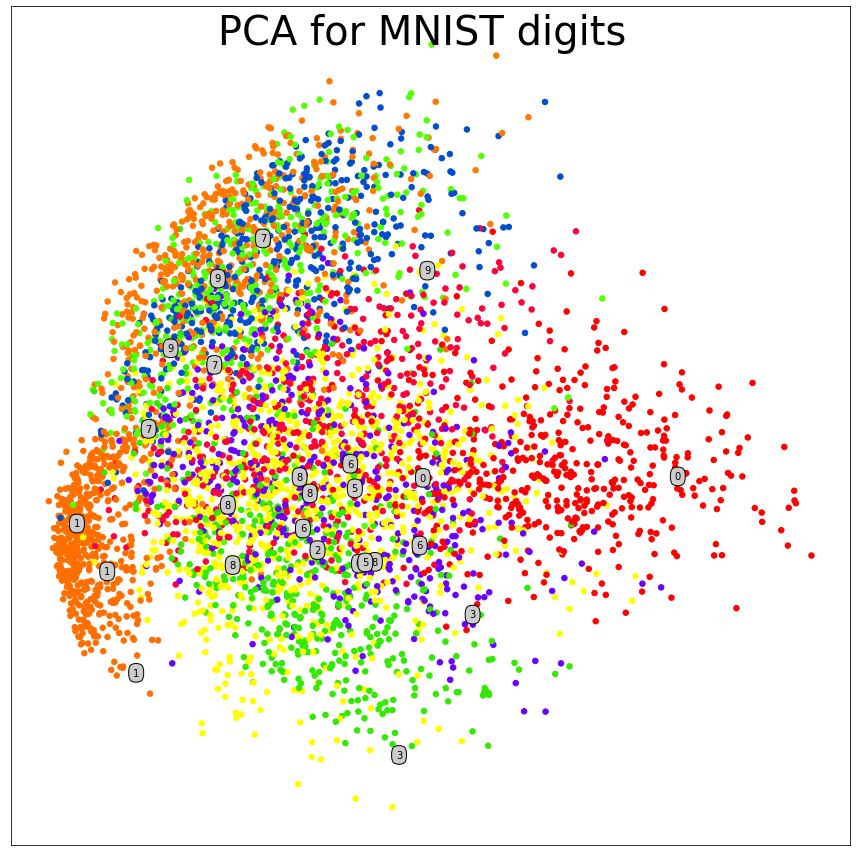

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

#use all digits
mytargets = list(range(0,10))
for digit in mytargets:
  instances=[i for i in y_train_subset if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")

pca = PCA(n_components=2)
fig, plot = plt.subplots()
fig.set_size_inches(12, 12)
plt.prism()

X_transformed = pca.fit_transform(x_train_subset_flat)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train_subset,s=30)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("PCA for MNIST digits ", fontsize=40)
for label , x, y in zip(y_train_subset, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

There is very much less linear separability, in the sense that the 7s and 1s are intermixed and difficult to separate. The zeros, sixes, fives and twos at the center are almost close to each other and are not easily separable. 

If you plotted say just 4s and 9s they are not separable by some curve. 1's and 7's have a higher degreee of separability. 

PCA is a linear transformation of the dimensions, and often miss important non-linear structure in the data. Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. 

We'll now look at some of these manifold learning techniques:

#### ISOMAP - Isometric Mapping
isomap.py
Let us see how the Isomap of the MNIST database for all the digits looks like.

Digit 0 appears  521 times
Digit 1 appears  543 times
Digit 2 appears  505 times
Digit 3 appears  521 times
Digit 4 appears  454 times
Digit 5 appears  463 times
Digit 6 appears  504 times
Digit 7 appears  543 times
Digit 8 appears  478 times
Digit 9 appears  468 times


[]

[]

Text(0.5, 0.98, 'Isomap for MNIST digits ')

Text(3.8231768495382616, -6.877401264736976, '5')

Text(-9.588513406657368, -0.2618549043413777, '7')

Text(12.217563588566614, -7.332350675524837, '6')

Text(-9.846211812900371, 2.686970151296722, '7')

Text(-5.00769976626267, -11.202972548643597, '8')

Text(6.155275438312129, -15.523589083682936, '8')

Text(-10.538177166314178, 6.63358052302939, '9')

Text(13.36180829689594, -3.4207134381623447, '0')

Text(12.839747810174083, -15.762413902721555, '3')

Text(22.36836660679116, 13.279929277006886, '0')

Text(-10.35062888087776, 2.8194857148428873, '9')

Text(-7.327461177956638, -8.046825105128471, '1')

Text(-1.8183824614598953, -8.961248019567151, '8')

Text(-0.7362334285963036, -11.716595444564332, '8')

Text(-7.515079133111833, 9.953459369851435, '7')

Text(10.261320544699187, 1.7896844862529155, '0')

Text(11.655894100846433, -15.369813514632826, '3')

Text(12.223507853074256, -2.870570875690778, '6')

Text(-4.9826845061630545, -5.842898061266284, '1')

Text(-6.687199471874811, -2.0498400336152014, '2')

Text(-6.102772759020625, -10.6065284960588, '1')

Text(6.756452462168512, -10.688904909563933, '5')

Text(-10.262865783973787, -0.22869249175318823, '9')

Text(0.9271242907127941, -9.773353027485662, '8')

Text(6.906915353601659, -4.30209225804246, '6')

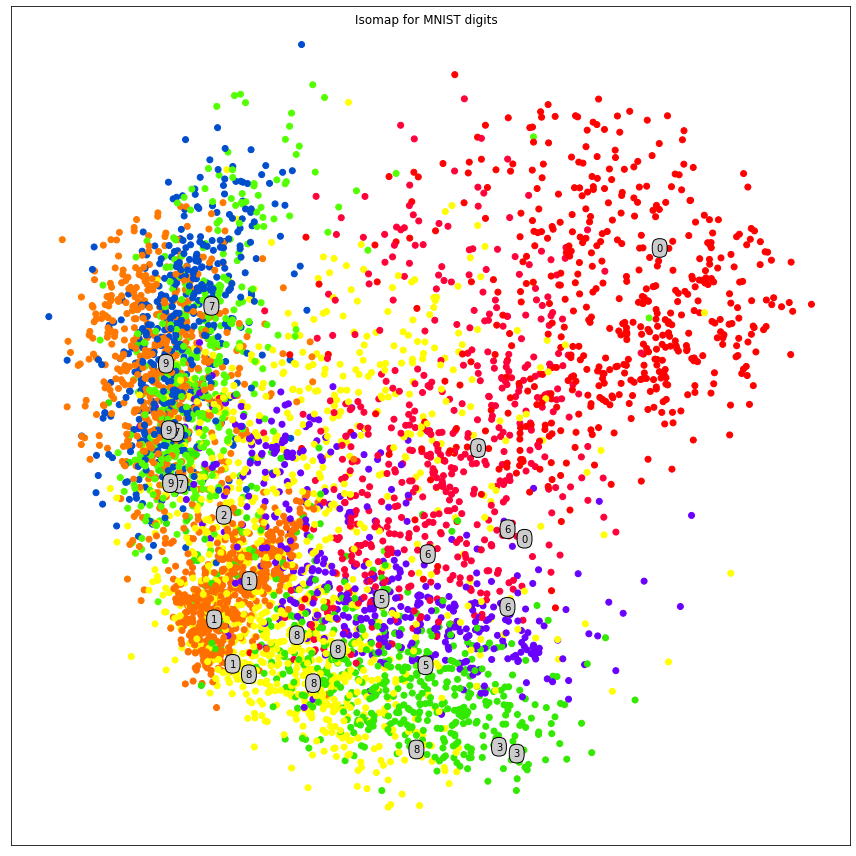

In [ ]:
from sklearn.manifold import Isomap

mytargets = list(range(0,10))

for digit in mytargets:
  instances=[i for i in y_train_subset if i==digit]
  print ("Digit",digit,"appears ",len(instances), "times")

transformer = Isomap(n_neighbors = 10, n_components = 2)
fig, plot = plt.subplots()
fig.set_size_inches(12, 12)
plt.prism()

X_transformed = transformer.fit_transform(x_train_subset_flat)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train_subset)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("Isomap for MNIST digits ")
for label , x, y in zip(y_train_subset, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

The Isomap for MNIST shows that the digits are better separable than PCA. 

Although not fully linearly separable, 4-9 seem to be having better separability when compare with PCA. Isomap for 1 and 7 shows a similar degree of separability like that of with PCA.

#### LLE - Local Linear Embedding
lle.py

Digit 0 appears  521 times
Digit 1 appears  543 times
Digit 2 appears  505 times
Digit 3 appears  521 times
Digit 4 appears  454 times
Digit 5 appears  463 times
Digit 6 appears  504 times
Digit 7 appears  543 times
Digit 8 appears  478 times
Digit 9 appears  468 times


[]

[]

Text(0.5, 0.98, 'LLE for MNIST digits ')

Text(0.0030498351867032022, -0.0022790130845849453, '5')

Text(-0.01710016616438952, 0.002825256481238797, '7')

Text(0.014416899019083738, 0.004590477076914857, '6')

Text(-0.015289205861743418, 0.0013862069639302933, '7')

Text(-0.0033709050085826563, -0.0010324366286766351, '8')

Text(0.0014967846106214075, -0.002250844456650978, '8')

Text(-0.013845057857465306, -0.004182337205492788, '9')

Text(0.019960503229755955, 0.013166188261313442, '0')

Text(0.003788021920590341, -0.0025669168907631293, '3')

Text(0.024725313156850455, 0.02049085657358361, '0')

Text(-0.009720776120292445, -0.01042340945691462, '9')

Text(-0.03379403551492403, 0.042407408641808225, '1')

Text(-0.0009005878076405934, -0.004807393853103451, '8')

Text(-0.0031819663909639796, -0.00144957327270462, '8')

Text(-0.012061333027148445, -0.009980044368448845, '7')

Text(0.019737114993189087, 0.014300861778628843, '0')

Text(0.003641035174310436, -0.0017937332295220518, '3')

Text(0.017338709000971758, 0.006638305549759445, '6')

Text(0.012803191161841688, -0.03305431337303012, '1')

Text(-0.010293280725835819, 0.00964287684534173, '2')

Text(-0.026543670695343618, 0.031753346811535466, '1')

Text(0.003615314489428506, -0.0031394719595715477, '5')

Text(-0.01295240655558644, -0.005354449781541426, '9')

Text(0.0002943683012028534, -0.0022669040656781428, '8')

Text(0.017836250780207265, 0.006066795746484889, '6')

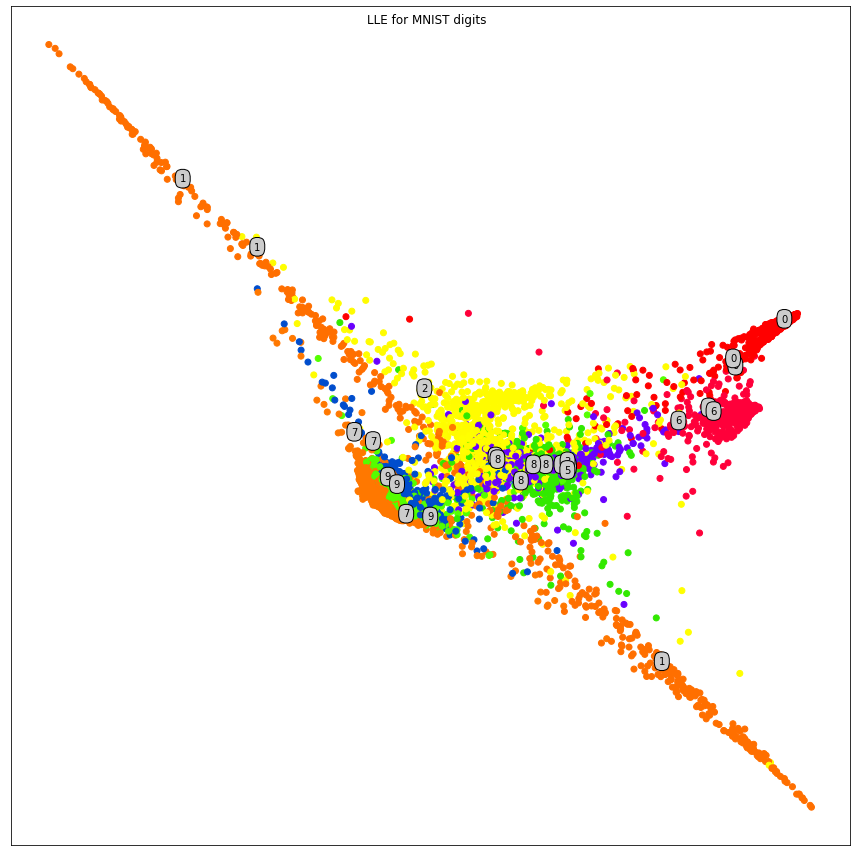

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

mytargets = list(range(0,10))
for digit in mytargets:
  instances=[i for i in y_train_subset if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")

transformer = LocallyLinearEmbedding(n_neighbors = 10, n_components = 2,
                                     eigen_solver='auto', method='standard')
fig, plot = plt.subplots()
fig.set_size_inches(12, 12)
plt.prism()

X_transformed = transformer.fit_transform(x_train_subset_flat)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train_subset)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("LLE for MNIST digits ")
for label , x, y in zip(y_train_subset, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png"
plt.show()

 Some local clusters are formed. We can observe that with LLE, the 7s and 9s have migrated to a cluster. This is because structurally the digits are very similar. 
 If we look at the LLE for the frequently confused digits, 4 and 9, LLE for digits 4 and 9 show better separability. Similarly, LLE plot for 1 and 7 shows very high degree of separability, with a very few 1s migrating to the 7 cluster. 

#### MDS - Multidimensional Scaling
mds.py

Let us see how the MDS of the MNIST database looks like.

Digit 0 appears  521 times
Digit 1 appears  543 times
Digit 2 appears  505 times
Digit 3 appears  521 times
Digit 4 appears  454 times
Digit 5 appears  463 times
Digit 6 appears  504 times
Digit 7 appears  543 times
Digit 8 appears  478 times
Digit 9 appears  468 times


[]

[]

Text(0.5, 0.98, 'MDS for MNIST digits ')

Text(1.0402338494613543, 6.588058681409603, '5')

Text(-2.2542333290012775, -1.8153285446949796, '7')

Text(7.11539028481969, -0.05683141970392242, '6')

Text(-7.418993207712316, -2.0529366417643367, '7')

Text(-4.006584355072799, -2.5687532499534917, '8')

Text(-4.629674076851658, -7.779843903576263, '8')

Text(9.59958274210804, -1.8697731367052224, '9')

Text(5.696653849992087, 2.839930608162113, '0')

Text(-9.181734669779603, -1.6627991334852774, '3')

Text(8.546820463757118, 6.129578332616723, '0')

Text(-3.67193584657756, -4.117269866125672, '9')

Text(-3.247352479635678, 2.291110683570803, '1')

Text(-5.149174084837843, 1.0442843209234431, '8')

Text(-7.597500640318076, -0.43698214658130874, '8')

Text(5.00122050815847, -6.523390996396715, '7')

Text(4.142325133852708, -3.8411181664229153, '0')

Text(-0.4238042990149022, 8.392077034211614, '3')

Text(-5.519246315366122, 4.315429790571699, '6')

Text(-2.313081447086169, -0.10808883171491311, '1')

Text(-1.187940069875793, -8.61870084154478, '2')

Text(-6.332476898703424, 1.599539431124954, '1')

Text(5.273417083061889, -2.15014202356366, '5')

Text(-0.5389081839374276, -2.3685147483122484, '9')

Text(4.945829193332593, 0.5439306876566228, '8')

Text(2.2776128813582597, -5.018322265174883, '6')

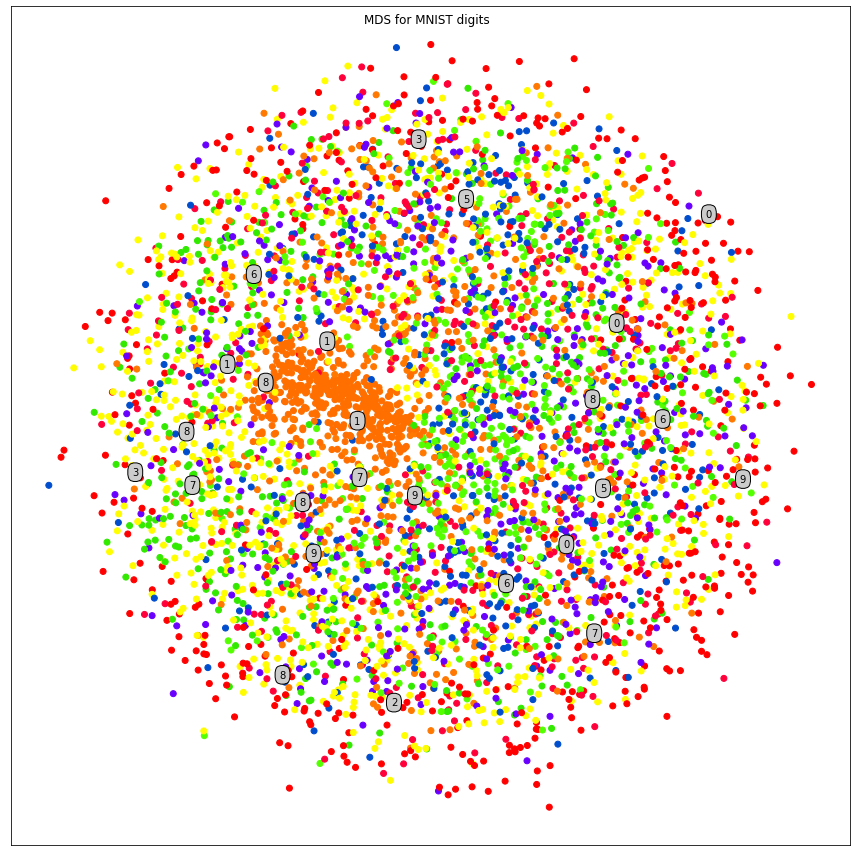

In [ ]:
from sklearn.manifold import MDS

mytargets = list(range(0,10))

for digit in mytargets:
  instances=[i for i in y_train_subset if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")

transformer = MDS(n_components = 2, max_iter=100, n_init=1)
fig, plot = plt.subplots()
fig.set_size_inches(12, 12)
plt.prism()

X_transformed = transformer.fit_transform(x_train_subset_flat)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train_subset)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("MDS for MNIST digits ")
for label , x, y in zip(y_train_subset, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

#### TSNE - t-distributed Stochastic Neighbor Embedding
tsne.py

Lets see tSNE plot for all MNIST digits.

Digit 0 appears  521 times
Digit 1 appears  543 times
Digit 2 appears  505 times
Digit 3 appears  521 times
Digit 4 appears  454 times
Digit 5 appears  463 times
Digit 6 appears  504 times
Digit 7 appears  543 times
Digit 8 appears  478 times
Digit 9 appears  468 times
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.351s...
[t-SNE] Computed neighbors for 5000 samples in 35.799s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 2.326429
[t-SNE] Computed conditional probabilities in 0.311s
[t-SNE] Iteration 50: error = 85.5000916, gradient norm = 0.0004570 (50 iterations in 2.004s)
[t-SNE] Iteration 100: error = 81.6488800, gradient norm = 0.0014928 (50 iteratio

[]

[]

Text(0.5, 0.98, 'TSNE for MNIST digits ')

Text(-12.7311125, -34.80599, '5')

Text(40.7476, 4.334237, '7')

Text(-42.235085, 7.5184445, '6')

Text(55.60751, 5.581533, '7')

Text(-9.061091, -8.747667, '8')

Text(-9.176153, -16.559427, '8')

Text(45.213562, -9.844098, '9')

Text(-59.905, 28.926094, '0')

Text(-37.746025, -23.811136, '3')

Text(-72.84809, 28.764997, '0')

Text(20.665976, -38.36563, '9')

Text(11.786983, 46.081764, '1')

Text(-3.5302038, -43.799503, '8')

Text(-0.2037345, -8.062366, '8')

Text(60.9507, -35.289917, '7')

Text(-58.170994, 19.774961, '0')

Text(-33.394726, -15.661112, '3')

Text(-33.54525, 1.8964055, '6')

Text(39.12372, 30.006994, '1')

Text(-2.8221614, 53.448673, '2')

Text(22.022352, 47.48285, '1')

Text(-21.666838, -34.05193, '5')

Text(38.448574, -3.7546291, '9')

Text(-2.366364, -16.176405, '8')

Text(-26.688997, 24.88763, '6')

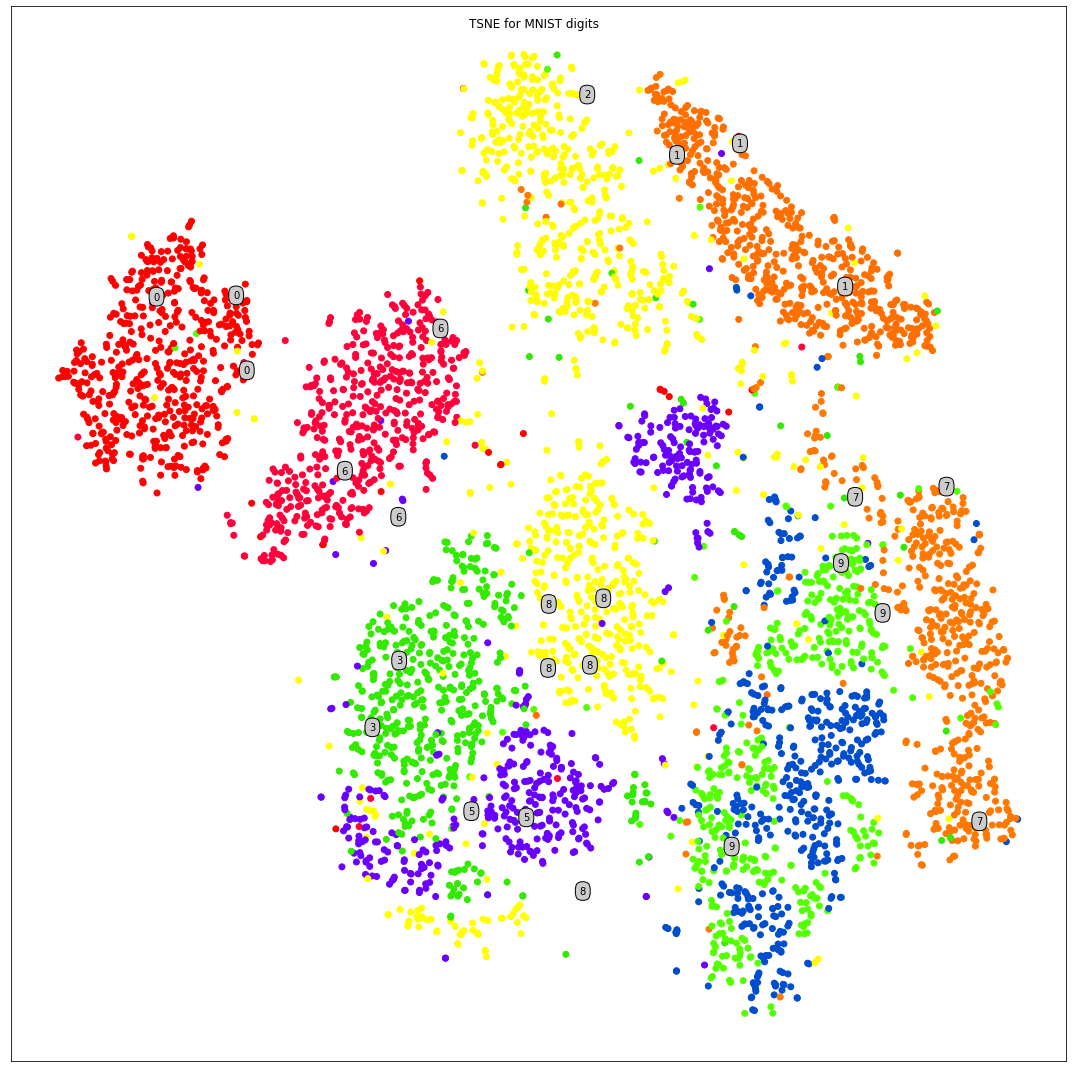

In [ ]:
from sklearn.manifold import TSNE

mytargets = list(range(0,10))

for digit in mytargets:
  instances=[i for i in y_train_subset if i==digit]
  print("Digit",digit,"appears ",len(instances), "times")

transformer = TSNE(n_components = 2, perplexity=40, verbose=2)
fig, plot = plt.subplots()
fig.set_size_inches(15, 15)
plt.prism()

X_transformed = transformer.fit_transform(x_train_subset_flat)
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_train_subset)
plot.set_xticks(())
plot.set_yticks(())

count=0;
plt.tight_layout()
plt.suptitle("TSNE for MNIST digits ")
for label , x, y in zip(y_train_subset, X_transformed[:, 0], X_transformed[:, 1]):
#Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
  if count % 200 == 0:
    plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10,bbox=dict(boxstyle="round4,pad=.5", fc="0.8"))
  count = count + 1
#plt.savefig("mnist_pca.png")
plt.show()

This looks better, in a way that there is a separate cluster for every digit. In other words, all samples with the same values are clustered together and there is no mixing of the clusters.

Iv we plot just 4's and 9's, we can observe that there is a very high degree of separation, ie. it is trivial to draw a straight line which separate the two classes, with very few non compliant samples. There is also a high degree of separability between the two classes 7 and 1. Same for 3 and 8. 



### Other

In [ ]:
tsne_model = TSNE(n_components=2, random_state=0)
tsne_data = tsne_model.fit_transform(data_5000_flat) # (5000, 2)
tsne_data = np.vstack((tsne_data.T, labels_5000)).T # (5000, 3) 
# tsne_data
tsne_data = pd.DataFrame(data=tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_5000_flat)
pca_data = np.vstack((pca_data.T, labels_5000)).T # (5000, 3) 

pca_data = pd.DataFrame(data=pca_data, columns=('Dim_1', 'Dim_2', 'label'))

Text(0.5, 0.98, 'Dimensionality Reduction')

Text(0.5, 1.0, 'PCA')

Text(0.5, 1.0, 't-SNE')

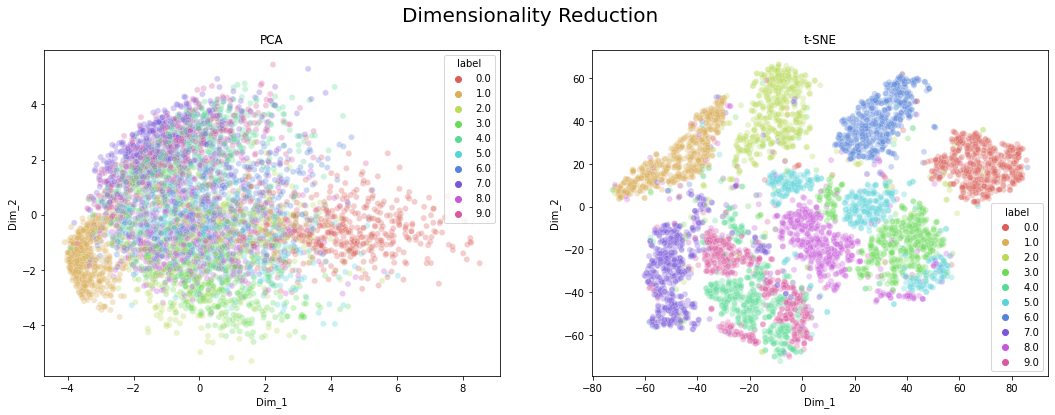

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))
fig.suptitle('Dimensionality Reduction', fontsize=20)

ax1.set_title('PCA')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=pca_data,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('t-SNE')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data,
    legend="full", alpha=0.3, ax=ax2)

Text(0.5, 0.98, 'Model Training Set Activations')

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Dense')

Text(0.5, 1.0, 'Output')

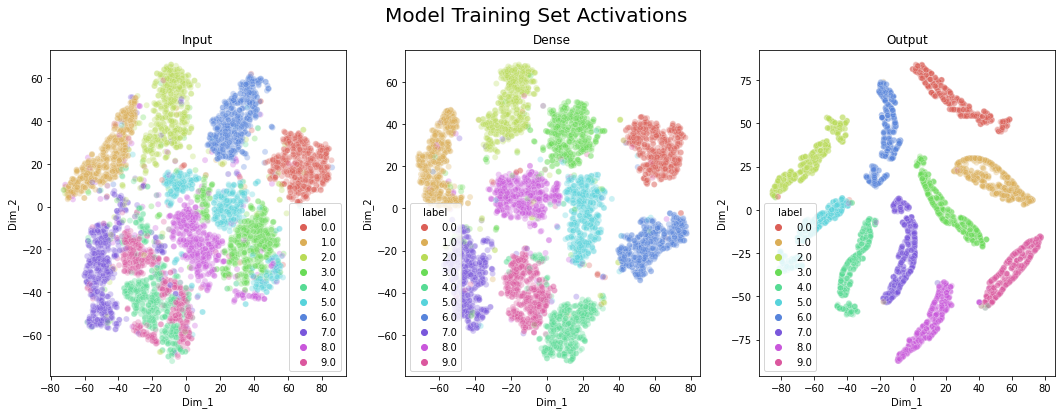

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))
fig.suptitle('Model Training Set Activations', fontsize=20)

ax1.set_title('Input')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsne_data,
    legend="full", alpha=0.3, ax=ax1)

ax2.set_title('Dense')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD128_1,
    legend="full", alpha=0.3, ax=ax2)

ax3.set_title('Output')
sns.scatterplot(x='Dim_1', y='Dim_2', hue="label",
    palette=sns.color_palette("hls", 10),
    data=tsneD128_2,
    legend="full", alpha=0.3, ax=ax3)